In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [307]:
df = pd.read_csv('preprocessed/data1h.csv', index_col=0, parse_dates=True)
df

,MpKrakZloRog,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindSpeed,AirPressure,year,day_off,month_sin,month_cos,hour_sin,hour_cos,sin_WindDir,cos_WindDir
2016-01-01 01:00:00,342.9240,-9.153333,0.000000,0.00,1.1,71.593333,0.703333,1000.516667,2016,1,5.000000e-01,0.866025,0.258819,0.965926,-0.996195,-0.087156
2016-01-01 02:00:00,329.6600,-9.475000,0.000000,0.00,1.4,71.685000,0.698333,1000.363333,2016,1,5.000000e-01,0.866025,0.500000,0.866025,-0.999848,-0.017452
2016-01-01 03:00:00,322.5390,-9.851667,0.000000,0.00,1.6,71.863333,0.743333,1000.123333,2016,1,5.000000e-01,0.866025,0.707107,0.707107,-0.974370,0.224951
2016-01-01 04:00:00,294.5480,-10.175000,0.000000,0.00,1.4,71.668333,0.661667,1000.190000,2016,1,5.000000e-01,0.866025,0.866025,0.500000,-0.961262,0.275637
2016-01-01 05:00:00,285.5270,-10.160000,0.000000,0.00,1.5,71.786667,0.600000,999.881667,2016,1,5.000000e-01,0.866025,0.965926,0.258819,-0.939693,-0.342020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,29.7133,4.635000,0.000000,0.00,1.6,74.210000,0.866667,980.588333,2023,1,-2.449294e-16,1.000000,-0.965926,0.258819,0.974370,0.224951
2023-12-31 20:00:00,32.3285,4.368333,0.000000,0.00,1.4,74.971667,0.721667,980.480000,2023,1,-2.449294e-16,1.000000,-0.866025,0.500000,0.358368,0.933580
2023-12-31 21:00:00,38.2589,3.943333,0.000000,0.00,1.2,76.206667,0.546667,980.611667,2023,1,-2.449294e-16,1.000000,-0.707107,0.707107,-0.358368,0.933580
2023-12-31 22:00:00,41.0132,3.903333,0.000000,0.00,1.5,76.143333,0.585000,980.510000,2023,1,-2.449294e-16,1.000000,-0.500000,0.866025,-0.515038,0.857167


<Axes: >

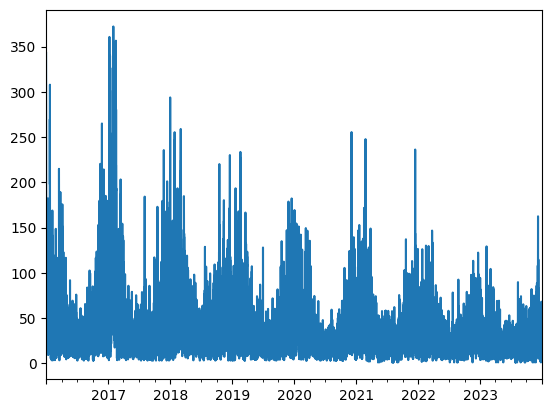

In [308]:
df.MpKrakZloRog.plot()
# outliers

In [309]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Hourly forecast

## One feature 

In [310]:
# only for pollution
def df_to_X_y_singular(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)       

In [311]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame({'Predictions': predictions, 'Actual Value': y})
    plt.plot(df['Actual Value'][start:end], label='Actual Value')
    plt.plot(df['Predictions'][start:end], label='Predictions')
    plt.legend()
    plt.show()
    return df, mean_squared_error(y, predictions), r2_score(y, predictions)

In [312]:
X, y = df_to_X_y_singular(df.MpKrakZloRog, window_size=12)

In [313]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [314]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 11, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 8)              │         5,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,841 (22.82 KB)

 Trainable params: 5,841 (22.82 KB)

 Non-trainable params: 0 (0.00 B)

In [315]:
cp = ModelCheckpoint('models/finals/singular_1h.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [316]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 346.1722 - root_mean_squared_error: 17.7618 - val_loss: 40.4889 - val_root_mean_squared_error: 6.3631
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 95.1415 - root_mean_squared_error: 9.7520 - val_loss: 40.1059 - val_root_mean_squared_error: 6.3329
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 92.7591 - root_mean_squared_error: 9.6292 - val_loss: 39.3993 - val_root_mean_squared_error: 6.2769
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 91.6975 - root_mean_squared_error: 9.5740 - val_loss: 41.7683 - val_root_mean_squared_error: 6.4628
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 94.3096 - root_mean_squared_error: 9.7101 - val_loss: 40.0484 - val_root_mean_squared_error: 6.3284
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 98.1967 - root_mean_squared_error: 9.9034 - val_loss: 39.9763 - val_root_mean_squared_error: 6.3227
Epoch 7/15
1875/1875 ━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


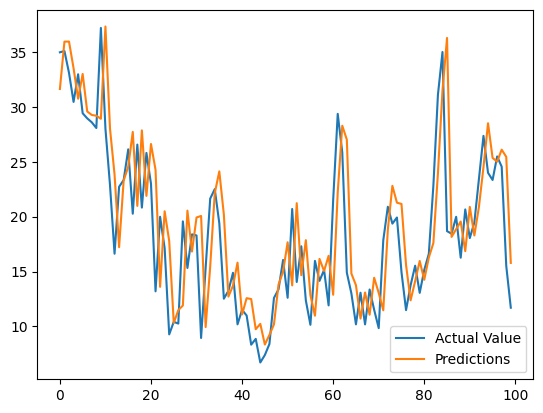

(      Predictions  Actual Value
 0       31.617113       34.9620
 1       35.933136       35.0748
 2       35.938026       33.0905
 3       33.516216       30.4439
 4       30.734095       32.9597
 ...           ...           ...
 5110    22.624750       29.7133
 5111    31.728945       32.3285
 5112    34.420525       38.2589
 5113    39.749241       41.0132
 5114    42.314156       47.8850
 
 [5115 rows x 2 columns],
 np.float64(36.79651998099154),
 0.8563521056157261)

In [317]:
plot_predictions(model, X_test, y_test)

## Date and weather features

In [71]:
def df_to_X_y_dw(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size, 1:]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)    

In [72]:
train_size = 60000
val_size = 5000

# features = ['MpKrakZloRog', 'AirTemp', 'RelativeHumidity', 'WindSpeed', 'AirPressure', 'year',
#             'month_sin', 'month_cos', 'hour_sin', 'hour_cos']
# features_iloc = [0, 1, 5, 6, 7, 8, 10, 11, 12, 13]
# df_train = df.iloc[:train_size, features_iloc].copy()
# df_val = df.iloc[train_size:train_size+val_size, features_iloc].copy()
# df_test = df.iloc[train_size+val_size:, features_iloc].copy()

df_train = df.iloc[:train_size].copy()
df_val = df.iloc[train_size:train_size+val_size].copy()
df_test = df.iloc[train_size+val_size:].copy()

In [73]:
# columns_to_scale = ['MpKrakZloRog', 'AirTemp', 'rainIntensity', 'rainAccumulation',
#       'maxWindSpeed', 'RelativeHumidity', 'WindSpeed', 'AirPressure', 'year']

columns_to_scale = ['AirTemp', 'rainIntensity', 'rainAccumulation',
       'maxWindSpeed', 'RelativeHumidity', 'WindSpeed', 'AirPressure', 'year']

# columns_to_scale = ['AirTemp', 'RelativeHumidity', 'WindSpeed', 'AirPressure', 'year']

# scaler just for training data to prevent data leakage
# separate scaler for y
scaler = StandardScaler()
scaler_y = StandardScaler()

scaler.fit(df_train[columns_to_scale])
scaler_y.fit(df_train.loc[:, 'MpKrakZloRog'].to_frame())

df_train[columns_to_scale] = scaler.transform(df_train[columns_to_scale])
df_train['MpKrakZloRog'] = scaler_y.transform(df_train['MpKrakZloRog'].to_frame())
df_val[columns_to_scale] = scaler.transform(df_val[columns_to_scale])
df_val['MpKrakZloRog'] = scaler_y.transform(df_val['MpKrakZloRog'].to_frame())
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])
df_test['MpKrakZloRog'] = scaler_y.transform(df_test['MpKrakZloRog'].to_frame())

In [74]:
window_size = 12
X_train, y_train = df_to_X_y_dw(df_train, window_size)
X_val, y_val = df_to_X_y_dw(df_val, window_size)
X_test, y_test = df_to_X_y_dw(df_test, window_size)

In [103]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, activation='relu'))

#model.add(Conv1D(64, kernel_size=2, activation='relu'))
#model.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
#model.add(LSTM(128, activation='relu', dropout=0.2)) # worse
#model.add(LSTM(64, activation='relu', dropout=0.2))
#model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(8, activation='relu')) # tanh or relu? 
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 64)             │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,009 (82.07 KB)

 Trainable params: 21,009 (82.07 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
cp = ModelCheckpoint('models/finals/date_weather.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [105]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.5477 - root_mean_squared_error: 0.7313 - val_loss: 0.1802 - val_root_mean_squared_error: 0.4245
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2941 - root_mean_squared_error: 0.5421 - val_loss: 0.1742 - val_root_mean_squared_error: 0.4174
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2640 - root_mean_squared_error: 0.5138 - val_loss: 0.1716 - val_root_mean_squared_error: 0.4142
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2543 - root_mean_squared_error: 0.5042 - val_loss: 0.1751 - val_root_mean_squared_error: 0.4184
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2380 - root_mean_squared_error: 0.4878 - val_loss: 0.1774 - val_root_mean_squared_error: 0.4212
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2356 - root_mean_squared_error: 0.4854 - val_loss: 0.1953 - val_root_mean_squared_error: 0.4419
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


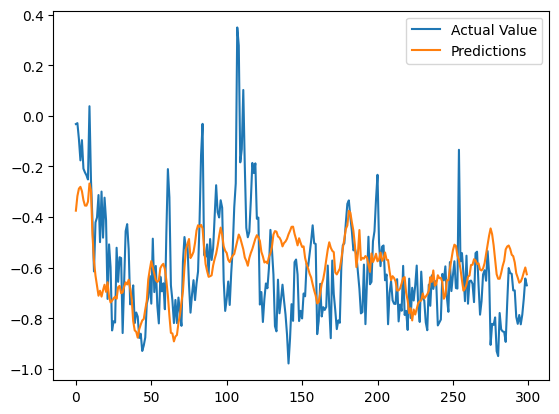

(      Predictions  Actual Value
 0       -0.374627     -0.032409
 1       -0.316797     -0.028827
 2       -0.287632     -0.091827
 3       -0.280431     -0.175853
 4       -0.297462     -0.095979
 ...           ...           ...
 5110    -0.054202     -0.199049
 5111    -0.018501     -0.116019
 5112     0.123838      0.072264
 5113     0.260968      0.159711
 5114     0.350013      0.377883
 
 [5115 rows x 2 columns],
 np.float64(0.10963475270555836),
 0.5753971865977426)

In [107]:
plot_predictions(model, X_test, y_test, start=0, end=300)

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


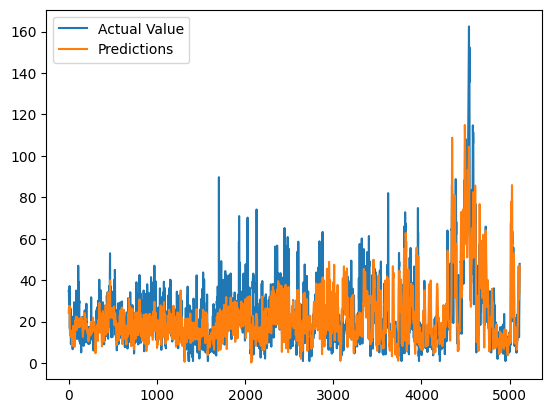

(np.float64(108.76529680514987),
 0.5753971876630881,
 np.float64(7.431966606764025))

In [108]:
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1))
plt.plot(y_test_inv, label='Actual Value')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()
mean_squared_error(y_test_inv, y_pred), r2_score(y_test_inv, y_pred), mean_absolute_error(y_test_inv, y_pred)

### Feature's importance

In [109]:
# shap?

## All features

In [134]:
# more features
def df_to_X_y(df, window_size=8):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)        

In [135]:
X_train, y_train = df_to_X_y(df_train)
X_val, y_val = df_to_X_y(df_val)
X_test, y_test = df_to_X_y(df_test)

In [189]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))

model.add(LSTM(128, activation='relu')) # slightly better then 64
# model.add(LSTM(32, return_sequences=True, activation='relu'))
# model.add(LSTM(32, return_sequences=True, activation='relu'))
# model.add(LSTM(32, return_sequences=True, activation='relu'))
# model.add(LSTM(32, activation='relu')) 

#model.add(Conv1D(64, kernel_size=2, activation='relu'))
# not much better as just one LSTM 
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(128, activation='relu')) 
# dropout makes predictions worse
# validation data for overfitting
#model.add(LSTM(64, activation='relu', dropout=0.2))
#model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(8, activation='tanh')) # more neurons does nothing
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                  │ (None, 128)            │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 8)              │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,281 (294.07 KB)

 Trainable params: 75,281 (294.07 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
cp = ModelCheckpoint('models/finals/all.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [191]:
# bigger batch size: similar results, much faster
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=128, callbacks=[cp])

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.5217 - root_mean_squared_error: 0.7075 - val_loss: 0.0588 - val_root_mean_squared_error: 0.2425
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1466 - root_mean_squared_error: 0.3829 - val_loss: 0.0442 - val_root_mean_squared_error: 0.2102
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1240 - root_mean_squared_error: 0.3519 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2012
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1163 - root_mean_squared_error: 0.3408 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1896
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1129 - root_mean_squared_error: 0.3355 - val_loss: 0.0355 - val_root_mean_squared_error: 0.1885
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1021 - root_mean_squared_error: 0.3195 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1979
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10m

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


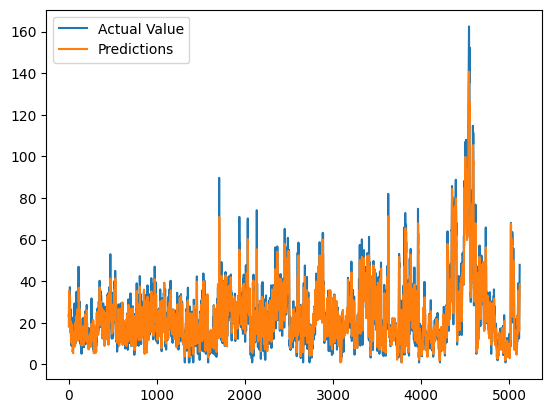

(np.float64(30.88217379095094),
 0.879351464471036,
 np.float64(3.9780781275127155))

In [192]:
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1))
plt.plot(y_test_inv, label='Actual Value')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()
mean_squared_error(y_test_inv, y_pred), r2_score(y_test_inv, y_pred), mean_absolute_error(y_test_inv, y_pred)

## Forecast

In [215]:
X_train, y_train = df_to_X_y(df_train, 24)
X_val, y_val = df_to_X_y(df_val, 24)
X_test, y_test = df_to_X_y(df_test, 24)

In [216]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))

model.add(LSTM(64, activation='relu')) 
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,265 (83.07 KB)

 Trainable params: 21,265 (83.07 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
cp = ModelCheckpoint('models/finals/forecast.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [218]:
# bigger batch size: similar results, much faster
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - loss: 0.3267 - root_mean_squared_error: 0.5641 - val_loss: 0.0579 - val_root_mean_squared_error: 0.2407
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - loss: 0.1275 - root_mean_squared_error: 0.3570 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1949
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - loss: 0.1092 - root_mean_squared_error: 0.3303 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1936
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0991 - root_mean_squared_error: 0.3147 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1921
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 0.0934 - root_mean_squared_error: 0.3056 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1877
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 0.0919 - root_mean_squared_error: 0.3029 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1849
Epoch 7/15
1875/1875 ━━━━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


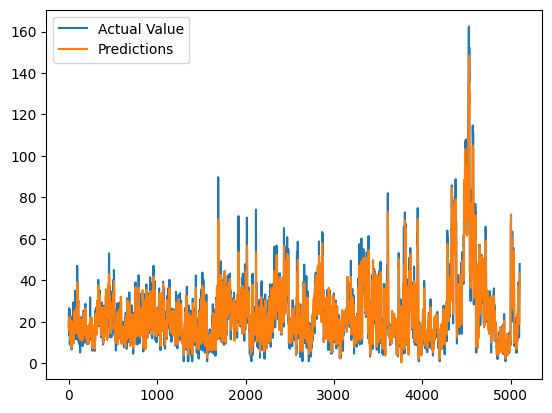

(np.float64(28.91686355132362),
 0.887304431417056,
 np.float64(3.890612790409092))

In [219]:
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1))
plt.plot(y_test_inv, label='Actual Value')
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()
mean_squared_error(y_test_inv, y_pred), r2_score(y_test_inv, y_pred), mean_absolute_error(y_test_inv, y_pred)

In [220]:
# same as in the trained model
# higher window_size for forecast
# batch_size different
window_size = 24 

In [222]:
y_pred = []
X_test_autoreg = X_test.copy()

for i in range(window_size, X_test_autoreg.shape[0]-1):  # start from 0
    # reshape for correct lstm input
    pred = model.predict(X_test_autoreg[i].reshape(1, X_test_autoreg.shape[1], X_test_autoreg.shape[2]), verbose=0)    
    y_pred.append(pred[0, 0]) # it's numpy array, but one value
    if len(y_pred) < window_size:
        X_test_autoreg[i+1, -len(y_pred):, 0] = y_pred
    else:
        X_test_autoreg[i+1, :, 0] = y_pred[-window_size:]
    # could be without if: y_pred[-windows_size:] - all, if too small
    # but how many hours at first

In [223]:
X_test - X_test_autoreg

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [224]:
mean_squared_error(y_test[window_size+1:], y_pred), r2_score(y_test[window_size+1: ], y_pred)
# forecast based on weather data, date data and predicted pollution

(np.float64(0.11282843816845235), 0.5654769146264838)

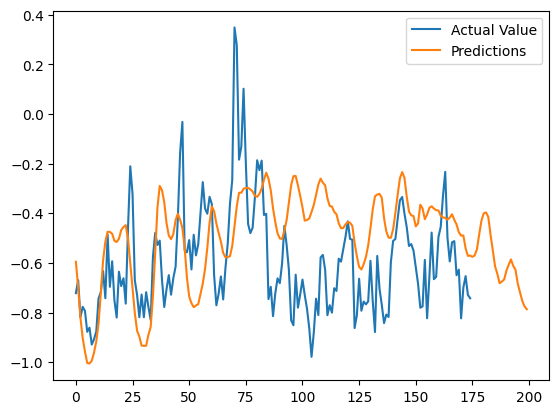

In [225]:
plt.plot(y_test[window_size+1:200], label='Actual Value')
plt.plot(y_pred[:200], label='Predictions')
plt.legend()
plt.show()

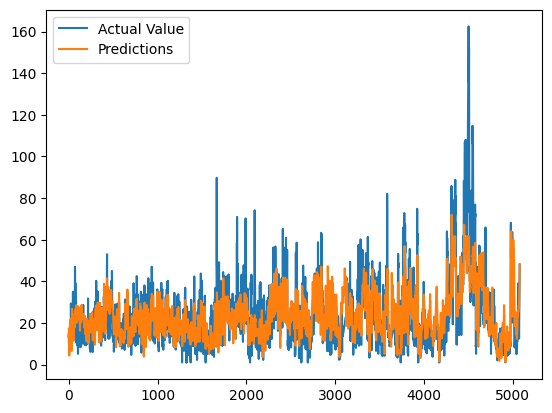

MSE: 111.93
R2: 0.57
MAE: 7.1929265008632655


In [244]:
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler_y.inverse_transform(np.array(y_pred).reshape(-1, 1))
plt.plot(y_test_inv[window_size+1:], label='Actual Value')
plt.plot(y_pred_inv, label='Predictions')
plt.legend()
plt.show()
print(f"MSE: {mean_squared_error(y_test_inv[window_size+1:], y_pred_inv):.2f}")
print(f"R2: {r2_score(y_test_inv[window_size+1:], y_pred_inv):.2f}")
print(f"MAE: {mean_absolute_error(y_test_inv[window_size+1:], y_pred_inv)}")

In [304]:
forecast_horizon = 1000 #24 * 2
y_forecast = []
X_test_forecast = X_test[:forecast_horizon+1].copy()

for i in range(X_test_forecast.shape[0]-1):  # forecast horizon
    # reshape for correct lstm input
    forecast = model.predict(X_test_forecast[i].reshape(1, X_test_forecast.shape[1], X_test_forecast.shape[2]), verbose=0)    
    y_forecast.append(forecast[0, 0]) # it's numpy array, but one value
    if len(y_forecast) < window_size:
        X_test_forecast[i+1, -len(y_forecast):, 0] = y_forecast
    else:
        X_test_forecast[i+1, :, 0] = y_forecast[-window_size:]
    # could be without if: y_pred[-windows_size:] - all, if too small
    # but how many hours at first

In [305]:
#len(y_forecast)
r2_score(y_test[:forecast_horizon], y_forecast)

0.19502794793384837

In [280]:
model.predict(X_test_forecast[0].reshape(1, X_test_forecast.shape[1], X_test_forecast.shape[2])), y_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


(array([[-0.4798366]], dtype=float32), np.float64(-0.6146392883850995))

In [291]:
check = model.predict(X_test)
scaler_y.inverse_transform(check)

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[20.8693  ],
       [16.844885],
       [19.780767],
       ...,
       [37.35973 ],
       [42.4582  ],
       [43.74986 ]], dtype=float32)

In [293]:
scaler_y.inverse_transform(y_test.reshape(-1, 1))

array([[16.6234],
       [22.7184],
       [23.3332],
       ...,
       [38.2589],
       [41.0132],
       [47.885 ]])

In [290]:
r2_score(y_test, check)

0.8873044315465852

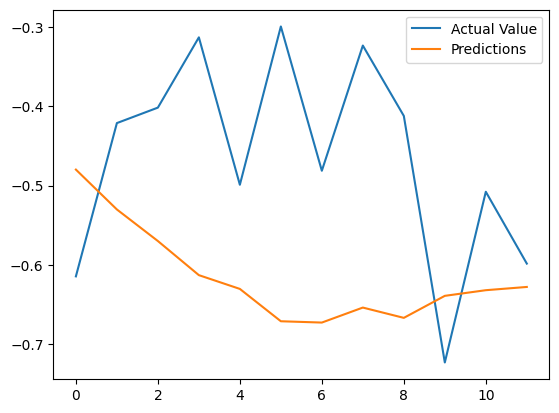

In [297]:
plt.plot(y_test[:forecast_horizon], label='Actual Value')
plt.plot(y_forecast, label='Predictions')
plt.legend()
plt.show()

# Direct Multi-Step Forecasting

In [207]:
def df_to_X_y_multi(df, window_size=24, forecast_horizon=12):
    df_as_np = df.to_numpy()
    X, y = [], []
    for i in range(len(df_as_np) - window_size - forecast_horizon):
        X.append(df_as_np[i:i+window_size])
        y.append(df_as_np[i+window_size:i+window_size+forecast_horizon, 0])
    return np.array(X), np.array(y)

In [208]:
forecast_horizon = 12 
X_train, y_train = df_to_X_y_multi(df_train, forecast_horizon=forecast_horizon)
X_val, y_val = df_to_X_y_multi(df_val, forecast_horizon=forecast_horizon)
X_test, y_test = df_to_X_y_multi(df_test, forecast_horizon=forecast_horizon)

In [209]:
model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(8, activation='relu'))
model.add(Dense(forecast_horizon, activation='linear'))
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_35 (LSTM)                  │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 12)             │           108 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,364 (83.45 KB)

 Trainable params: 21,364 (83.45 KB)

 Non-trainable params: 0 (0.00 B)

In [210]:
cp = ModelCheckpoint('models/finals/multi_step.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [211]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - loss: 0.6897 - root_mean_squared_error: 0.8291 - val_loss: 0.2424 - val_root_mean_squared_error: 0.4924
Epoch 2/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - loss: 0.3678 - root_mean_squared_error: 0.6063 - val_loss: 0.1726 - val_root_mean_squared_error: 0.4154
Epoch 3/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.3020 - root_mean_squared_error: 0.5495 - val_loss: 0.1528 - val_root_mean_squared_error: 0.3909
Epoch 4/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.2759 - root_mean_squared_error: 0.5252 - val_loss: 0.1517 - val_root_mean_squared_error: 0.3894
Epoch 5/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 0.2578 - root_mean_squared_error: 0.5077 - val_loss: 0.1466 - val_root_mean_squared_error: 0.3829
Epoch 6/15
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 0.2423 - root_mean_squared_error: 0.4922 - val_loss: 0.1480 - val_root_mean_squared_error: 0.3847
Epoch 7/15
1874/1874 ━━━━━━━

In [212]:
# for ech row next n hours
y_pred = model.predict(X_test)

160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [213]:
mse = [mean_squared_error(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
r2 = [r2_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

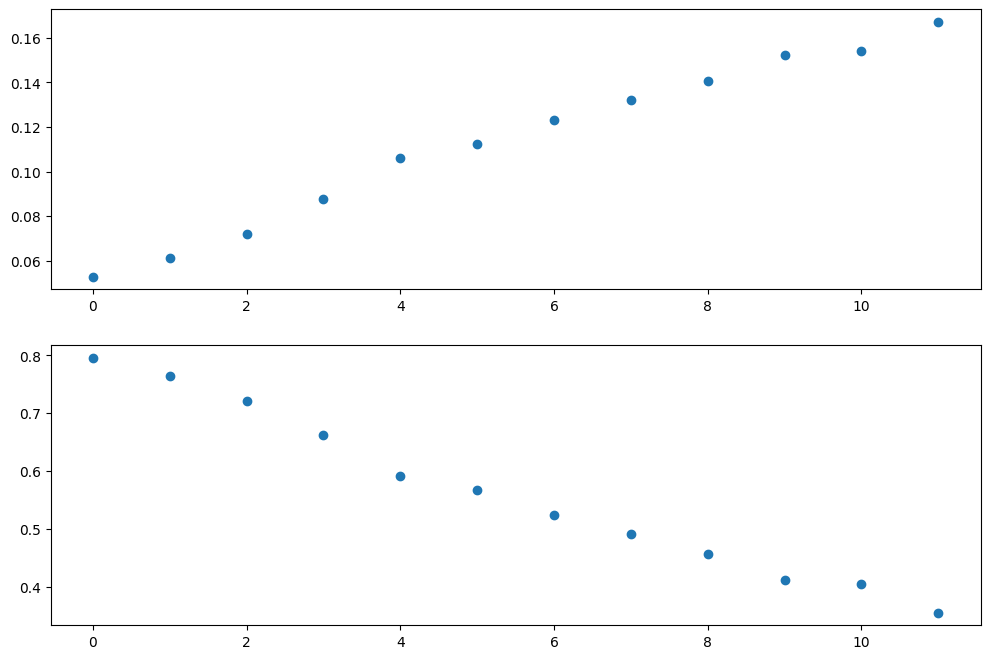

In [214]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].scatter(x = range(y_test.shape[1]), y = mse)
axs[1].scatter(x = range(y_test.shape[1]), y = r2)
plt.show()